# 1. Import Packages

In [1]:
from mlrose_local import mlrose
import numpy as np
import pandas as pd
import copy
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# 2. Knapsack Problem

In [2]:
# number of iterations for each setting in grid search
iters = 5
results = {} 

np.random.seed(2)

maxWeight = 0.65

n_items = [10, 20, 30, 40, 50, 75, 100]
# Initialize backpack parameters here so all algo's use the same problems
weights = {}
values = {}
for n_item in n_items:
    weights[n_item] = np.random.rand(n_item)
    values[n_item] = np.random.rand(n_item)

problem = mlrose.DiscreteOpt

# Define algorithms
algorithms = {
    'Randomized hill climbing': {
        'algorithm': mlrose.random_hill_climb,
        'param_grid_algorithm': {'return_statistics': True, 'restarts': 5, 'max_attempts': 20},
    },
    'Simulated Annealing': {
        'algorithm': mlrose.simulated_annealing,
        'param_grid_algorithm': {'return_statistics': True, 'max_attempts': 100},
    },
    'Genetic Algorithm': {
        'algorithm': mlrose.genetic_alg,
        'param_grid_algorithm': {'return_statistics': True, 'elite': 0.3, 'pop_size': ['5*problem_length'], 'mutation_prob': 0.1, 'max_attempts': 10},
    },  
    'MIMIC': {
        'algorithm': mlrose.mimic,
        'param_grid_algorithm': {'return_statistics': True, 'pop_size': ['2*problem_length'], 'keep_pct': [0.2], 'max_attempts': [15], 'max_iters': 1000},
    },
}
    
for algo_name, settings in algorithms.items():
    results[algo_name] = []
    for n_item in n_items:
        fitness_fn = mlrose.Knapsack(weights[n_item], values[n_item], maxWeight)

        param_grid_problem = {'fitness_fn': fitness_fn,
                              'max_val': 2,
                              'length': n_item, 
                             }
        thisSettings = copy.deepcopy(settings.copy())
        thisSettings['problem'] = problem
        thisSettings['param_grid_problem'] = param_grid_problem
    
        #print(f"Looping for {algo_name}, n_item={n_item}")
        gs = mlrose.GridSearch(algorithm=thisSettings['algorithm'], param_grid_algorithm=thisSettings['param_grid_algorithm'], 
                               problem=thisSettings['problem'], param_grid_problem=thisSettings['param_grid_problem'], iters=iters)
        gs.evaluate()
        this_df = pd.DataFrame(gs.results)
        results[algo_name].extend(gs.results)

Running case 1/1: iteration 0
Running case 1/1: iteration 1
Running case 1/1: iteration 2
Running case 1/1: iteration 3
Running case 1/1: iteration 4
Running case 1/1: iteration 0
Running case 1/1: iteration 1
Running case 1/1: iteration 2
Running case 1/1: iteration 3
Running case 1/1: iteration 4
Running case 1/1: iteration 0
Running case 1/1: iteration 1
Running case 1/1: iteration 2
Running case 1/1: iteration 3
Running case 1/1: iteration 4
Running case 1/1: iteration 0
Running case 1/1: iteration 1
Running case 1/1: iteration 2
Running case 1/1: iteration 3
Running case 1/1: iteration 4
Running case 1/1: iteration 0
Running case 1/1: iteration 1
Running case 1/1: iteration 2
Running case 1/1: iteration 3
Running case 1/1: iteration 4
Running case 1/1: iteration 0
Running case 1/1: iteration 1
Running case 1/1: iteration 2
Running case 1/1: iteration 3
Running case 1/1: iteration 4
Running case 1/1: iteration 0
Running case 1/1: iteration 1
Running case 1/1: iteration 2
Running ca

Search ended with attempts>max_attempts (10>10).  Iters=31
Running case 1/1: iteration 0
MIMIC finished after using 15/15 attempts, 16/1000, iters
Running case 1/1: iteration 1
MIMIC finished after using 15/15 attempts, 16/1000, iters
Running case 1/1: iteration 2
MIMIC finished after using 15/15 attempts, 16/1000, iters
Running case 1/1: iteration 3
MIMIC finished after using 15/15 attempts, 16/1000, iters
Running case 1/1: iteration 4
MIMIC finished after using 15/15 attempts, 16/1000, iters
Running case 1/1: iteration 0
MIMIC finished after using 15/15 attempts, 19/1000, iters
Running case 1/1: iteration 1
MIMIC finished after using 15/15 attempts, 18/1000, iters
Running case 1/1: iteration 2
MIMIC finished after using 15/15 attempts, 18/1000, iters
Running case 1/1: iteration 3
MIMIC finished after using 15/15 attempts, 16/1000, iters
Running case 1/1: iteration 4
MIMIC finished after using 15/15 attempts, 16/1000, iters
Running case 1/1: iteration 0
MIMIC finished after using 15/1

# 3. Helpful functions

In [3]:
def plot_results(results_df, optimum_line = None, savefig = None, invert_fitness = False):
    fig, ax_fitness = plt.subplots()
    ax_fitness.set_xlabel("param_problem_length")
    ax_fitness.set_ylabel("mean_best_fitness")

    fig, ax_f_evals = plt.subplots()
    ax_f_evals.set_xlabel("param_problem_length")
    ax_f_evals.set_ylabel("mean_fitness_evals")

    fig, ax_f_evals_best = plt.subplots()
    ax_f_evals_best.set_xlabel("param_problem_length")
    ax_f_evals_best.set_ylabel("mean_fitness_evals_to_best")

    fig, ax_time = plt.subplots()
    ax_time.set_xlabel("param_problem_length")
    ax_time.set_ylabel("mean_time")

    fig, ax_time_f_evals = plt.subplots()
    ax_time_f_evals.set_xlabel("mean_fitness_evals")
    ax_time_f_evals.set_ylabel("mean_time")


    for algo_name in sorted(results_df):
        df = results_df[algo_name]
        if invert_fitness:
            ax_fitness.plot(df['param_problem_length'], 1 / df['mean_best_fitness'], ls='--', marker='o', label=algo_name)
        else:
            ax_fitness.plot(df['param_problem_length'], df['mean_best_fitness'], ls='--', marker='o', label=algo_name)
        ax_f_evals.plot(df['param_problem_length'], df['mean_fitness_evals'], ls='--', marker='o', label=algo_name)
        ax_f_evals_best.plot(df['param_problem_length'], df['mean_fitness_evals_to_best_state'], ls='--', marker='o', label=algo_name)
        ax_time.plot(df['param_problem_length'], df['mean_time'], ls='--', marker='o', label=algo_name)
        ax_time_f_evals.plot(df['mean_fitness_evals'], df['mean_time'], ls='--', marker='o', label=algo_name)
    
    if optimum_line is not None:
        optimum_line = np.asarray(optimum_line)
        ax_fitness.plot(optimum_line[:, 0], optimum_line[:, 1], ls=':', color='k', label="Optimum")

    # 0 for y axis min
    ax_f_evals.set_ylim([0, None])
    ax_f_evals_best.set_ylim([0, None])
    ax_time.set_ylim([0, None])
    ax_time_f_evals.set_ylim([0, None])

    # Set f_eval plots to same scale
    ax_f_evals_best.set_ylim(ax_f_evals.get_ylim())

    if invert_fitness:
        ax_fitness.set(xlabel='Problem Length', ylabel='1 / Fitness')
    else:
        ax_fitness.set(xlabel='Problem Length', ylabel='Fitness')
    ax_f_evals.set(xlabel='Problem Length', ylabel='Fitness Evaluations (total)')
    ax_f_evals_best.set(xlabel='Problem Length', ylabel='Fitness Evaluations to Optimum')
    ax_time.set(xlabel='Problem Length', ylabel='Search Time (s)')
    ax_time_f_evals.set(xlabel='Fitness Evalautions', ylabel='Search Time (s)')

    ax_fitness.get_figure().tight_layout()
    ax_f_evals.get_figure().tight_layout()
    ax_f_evals_best.get_figure().tight_layout()
    ax_time.get_figure().tight_layout()
    ax_time_f_evals.get_figure().tight_layout()

    ax_fitness.legend()
    ax_f_evals.legend()
    ax_f_evals_best.legend()
    ax_time.legend()
    ax_time_f_evals.legend()

    if savefig is not None:
        ax_fitness.get_figure().savefig(f'{savefig}_fitness_.png')
        ax_f_evals.get_figure().savefig(f'{savefig}_f_evals_.png')
        ax_f_evals_best.get_figure().savefig(f'{savefig}_f_evals_best_.png')
        ax_time.get_figure().savefig(f'{savefig}_time_.png')
        ax_time_f_evals.get_figure().savefig(f'{savefig}_time_f_evals_.png')

    plt.plot()

# 3. Display results

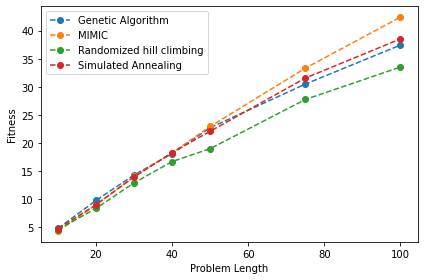

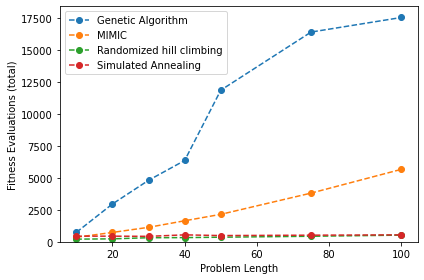

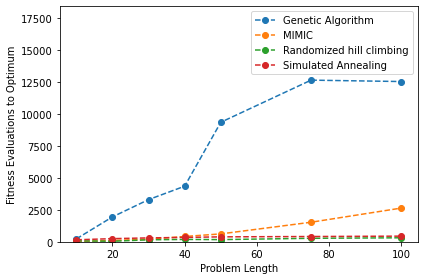

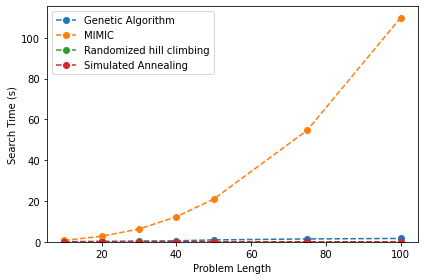

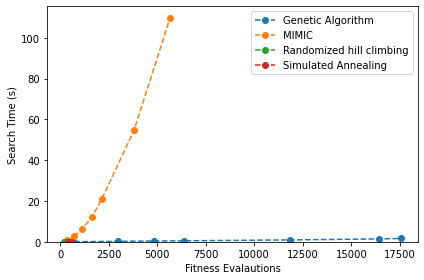

In [4]:
results_df = {k: pd.DataFrame(r) for k, r in results.items()}
plot_results(results_df)